# Part 1: Introduction to SpatialData & Interactive Exploration

**Tutor:** Tim Treis
**Time:** 40 minutes

---

Welcome to the workshop! In this first notebook, we will introduce the core concepts behind the `SpatialData` framework.

**Goals:**
1. Understand the different components of a spatial dataset (Images, Labels, Shapes, Points).
2. Learn how the `SpatialData` object acts as a unified container for these components.
3. Gain hands-on experience exploring complex spatial data interactively with `napari`.

### What is a `SpatialData` object?

Modern spatial omics experiments generate diverse types of data. For example, a single experiment might produce:

*   A high-resolution histology image (**Image**).
*   Segmentation masks defining where the cells are (**Labels**).
*   Polygons outlining cell boundaries (**Shapes**).
*   The locations of individual RNA molecules (**Points**).
*   A table of gene counts per cell (**Table**).

The `SpatialData` framework, part of the `scverse` ecosystem, provides a single, standardized object to hold all these different *elements* together in a coordinated way.

<img src="../resources/elements.png" alt="spatialdata design is modular" style="max-width: 800px;">

### Loading our First Dataset: A Xenium Example

To begin, we will load a pre-processed dataset into a `SpatialData` object. For this workshop, we will be working with the `.zarr` format, which is a modern, high-performance storage format ideal for large scientific data.

Our first dataset is a `Xenium` experiment, which is a great example because it contains all the different types of spatial elements.

In [1]:
%load_ext jupyter_black

import spatialdata as sd

# Define the path to our data directory
# Note: This path is relative to the repository's root directory
data_path = "../data/"

print(data_path + "xenium_lung_cancer_subset.zarr")

# Load the pre-processed Xenium dataset
sdata_xenium = sd.read_zarr(data_path + "xenium_lung_cancer_subset.zarr")

/opt/miniconda3/envs/ome/lib/python3.13/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/opt/miniconda3/envs/ome/lib/python3.13/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


../data/xenium_lung_cancer_subset.zarr


/opt/miniconda3/envs/ome/lib/python3.13/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/opt/miniconda3/envs/ome/lib/python3.13/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/opt/miniconda3/envs/ome/lib/python3.13/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/opt/miniconda3/envs/ome/lib/python3.13/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/opt/miniconda3/envs/ome/lib/python3.13/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwa

Let's inspect the `SpatialData` object we just created. Notice how it contains all the different data elements, including **multiscale images**. These are image pyramids that store the same image at different resolutions, which is key for fast visualization of very large images.

![image pyramid](../resources/image_pyramid.png)

In [2]:
sdata_xenium

SpatialData object, with associated Zarr store: /Users/macbook/embl/projects/basel/Spatial-Workshop/data/xenium_lung_cancer_subset.zarr
├── Images
│     ├── 'he_image': DataTree[cyx] (3, 5636, 1448), (3, 2818, 724), (3, 1409, 362), (3, 704, 181), (3, 352, 90)
│     └── 'morphology_focus': DataTree[cyx] (1, 17098, 51187), (1, 8549, 25593), (1, 4274, 12796), (1, 2137, 6398), (1, 1068, 3199)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (17098, 51187), (8549, 25593), (4274, 12796), (2137, 6398), (1068, 3199)
│     └── 'nucleus_labels': DataTree[yx] (17098, 51187), (8549, 25593), (4274, 12796), (2137, 6398), (1068, 3199)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 11) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (162254, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (162254, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (156628, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (162254, 377)
with

We can easily access any part of the object, for example, the table of gene counts, which is stored as an `anndata.AnnData` object that many of you may be familiar with from single-cell analysis.

In [3]:
sdata_xenium.tables["table"]

AnnData object with n_obs × n_vars = 162254 × 377
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'z_level', 'nucleus_count', 'cell_labels'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatialdata_attrs'
    obsm: 'spatial'

### Interactive Exploration with `napari`

While printing the object summary is useful, the best way to understand spatial data is to *see* it. We use **Napari**, a fast, interactive, multi-dimensional image viewer, to explore our `SpatialData` objects.

The `napari-spatialdata` plugin provides the bridge between our data and the viewer. To demonstrate its features, we'll load a `MERFISH` dataset, another high-resolution imaging-based technology.

In [4]:
sdata_merfish = sd.read_zarr(data_path + "merfish_subset.zarr")
sdata_merfish

/opt/miniconda3/envs/ome/lib/python3.13/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


SpatialData object, with associated Zarr store: /Users/macbook/embl/projects/basel/Spatial-Workshop/data/merfish_subset.zarr
├── Images
│     └── 'rasterized': DataArray[cyx] (1, 522, 575)
├── Points
│     └── 'single_molecule': DataFrame with shape: (<Delayed>, 3) (2D points)
├── Shapes
│     ├── 'anatomical': GeoDataFrame shape: (6, 1) (2D shapes)
│     └── 'cells': GeoDataFrame shape: (2389, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (2389, 268)
with coordinate systems:
    ▸ 'global', with elements:
        rasterized (Images), single_molecule (Points), anatomical (Shapes), cells (Shapes)

#### Your Turn: Launching Napari

Now, let's launch the interactive viewer. 

**Instructions:**
1. Uncomment and run the code cell below.
2. A new window for Napari should appear. This may take a few seconds.
3. Follow along as we tour the interface and explore the data layers.

**Troubleshooting**
`napari` support within Docker containers is limited. If you are not able to run the notebook with the current Docker configuration, please skip the cell below and follow the demo from the instructor. To run `napari` locally without Docker, please use `mamba`, as explained in [the section "Using conda / mamba" from this guide](https://github.com/PMBio/spatialdata-workshops/tree/main?tab=readme-ov-file#using-conda--mamba).

In [31]:
from napari_spatialdata import Interactive

# run napari
Interactive(sdata_merfish)

2025-11-11 14:18:16.216 | WARNING  | napari_spatialdata._viewer:__init__:57 - Due to Shift-L being used as shortcut in napari, it is being deprecated and might not link a new layer to an existing SpatialData object in the viewer. Please use ⌘-L on MacOS or else Ctrl-L.


<div style="border: 1px solid #4CAF50; border-left-width: 15px; padding: 10px; background-color: #F0FFF0; color: black;">
    <strong>Tip:</strong>
    <p>You can also view a .zarr file from your terminal with:<br><code>python -m napari_spatialdata view ../data/merfish_subset.zarr</code>.</p>
</div>

### Tour of the `napari-spatialdata` Interface

The Napari window is composed of several key parts. The `napari-spatialdata` plugin adds the panels highlighted in green.

![overview of the napari-spatialdata interface](../resources/napari_spatialdata0.jpg)

**Key areas to know:**
- **Layers list (bottom-left):** This is where you can see all the data layers (images, shapes, points) and toggle their visibility, change their order, or adjust their opacity.
- **`spatialdata` viewer (top-right):** This shows you which coordinate systems are available and lets you select elements to view.
- **`spatialdata` table annotation (bottom-right):** This powerful panel lets you color your spatial elements (like cells) by any value in the associated `AnnData` table.

Here is an example of adding elements to the viewer and interacting with them.

![adding elements](../resources/napari_spatialdata1.gif)
![interaction with napari](../resources/napari_spatialdata2.gif)

The real power comes from coloring your spatial elements by their associated data. Here, we color cells by different annotations stored in the `AnnData` table, including categorical variables (`region`) and continuous variables (gene expression).

![showing annotations](../resources/napari_spatialdata3.gif)

The various selectors on the right side of the interface reflect the structure of the `AnnData` object that annotates our spatial elements. The dropdown menus map directly to the `.obs`, `.layers`, and `.obsm` slots of the table.

<img src="https://raw.githubusercontent.com/scverse/anndata/main/docs/_static/img/anndata_schema.svg" width="500" height="500">

#### Advanced Tip: Coloring Points by their Own Attributes

Most of the time, you will color cells/spots by data in an `AnnData` table. However, it's also possible to color `Points` or `Shapes` by columns in their own internal dataframe. For example, individual transcripts might have a `quality_value` column.

The "Dataframe columns" list widget at the bottom of the annotation panel allows you to do this.

![showing annotations points](../resources/napari_spatialdata4.jpg)

This concludes our introduction to the `SpatialData` object and interactive visualization. In the next notebook, we'll learn how to create static, publication-ready plots and compute our first spatial statistics.

# Interactive visualization with Vitessce

We will be using `easy_vitessce`, a tool developed by Selena Luo and Mark Keller by the HIDIVE Lab (HMS).

In [8]:
import easy_vitessce
import spatialdata_plot

sdata_merfish.pl.render_images("rasterized").pl.show()

VitessceWidget(js_dev_mode=True, uid='1251')

In [12]:
sdata_merfish.pl.render_images("rasterized").pl.render_shapes(
    "cells", color="Vwc2"
).pl.show()

VitessceWidget(js_dev_mode=True, uid='8945')

In [18]:
sdata_merfish.pl.render_images("rasterized").pl.render_shapes(
    "cells", color="Vwc2"
).pl.render_shapes("anatomical").pl.show()

VitessceWidget(js_dev_mode=True, uid='30bd')

In [21]:
# currently plotting annotations on the points is not supported in easy_vitessce

sdata_merfish.pl.render_images("rasterized").pl.render_shapes(
    "cells", color="Vwc2"
).pl.render_points("single_molecule", color="cell_type").pl.show()

VitessceWidget(js_dev_mode=True, uid='c07d')

In [ ]:
# currently plotting annotations on the points is not supported in easy_vitessce

sdata_merfish.pl.render_images("rasterized").pl.render_shapes(
    "cells", color="Vwc2"
).pl.render_points("single_molecule", color="cell_type").pl.show()

In [24]:
easy_vitessce.configure_plots(disable_plots=["spatialdata-plot"])

Deactivated Vitessce spatialdata-plot


/opt/miniconda3/envs/ome/lib/python3.13/site-packages/spatialdata/_core/_elements.py:108: UserWarning: Key `cells` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/opt/miniconda3/envs/ome/lib/python3.13/site-packages/spatialdata/_core/_elements.py:128: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/opt/miniconda3/envs/ome/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:82: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  return fn(*args_all, **kw)
/opt/miniconda3/envs/ome/lib/python3.13/functools.py:929: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


INFO     Using 'datashader' backend with 'None' as reduction method to speed up plotting. Depending on the         
         reduction method, the value range of the plot might change. Set method to 'matplotlib' do disable this    
         behaviour.                                                                                                


/opt/miniconda3/envs/ome/lib/python3.13/site-packages/spatialdata/_core/_elements.py:118: UserWarning: Key `single_molecule` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/macbook/embl/projects/basel/spatialdata-plot/src/spatialdata_plot/pl/utils.py:872: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_mapping)
/opt/miniconda3/envs/ome/lib/python3.13/site-packages/dask/dataframe/core.py:3769: UserWarning: Dask currently has limited support for converting pandas extension dtypes to arrays. Converting string to object dtype.
  warnings.warn(
/opt/miniconda3/envs/ome/lib/python3.13/site-packages/dask/dataframe/core.py:3769: UserWarning: Dask currently has limited support for converting pandas extension

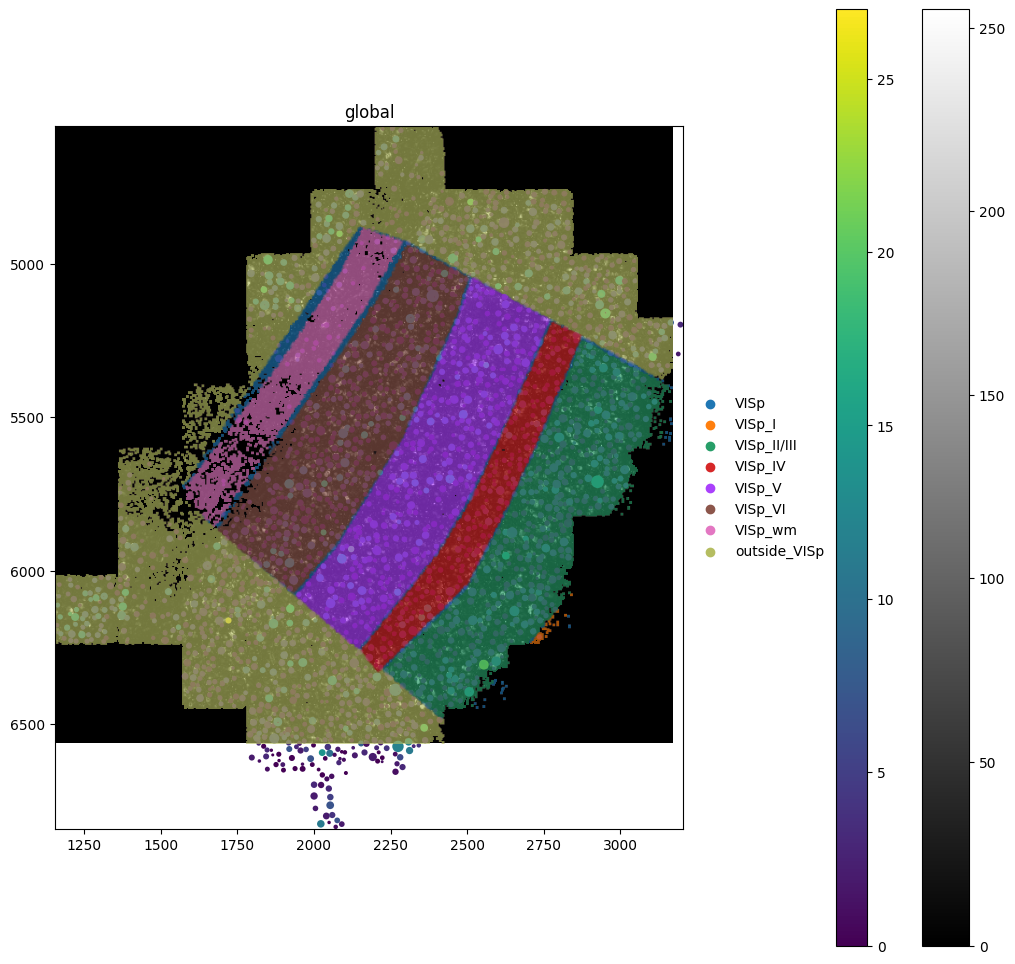

In [30]:
sdata_merfish.pl.render_images("rasterized", cmap="gray").pl.render_shapes(
    "cells", color="Vwc2"
).pl.render_points("single_molecule", color="cell_type", alpha=0.8).pl.show(
    figsize=(10, 10)
)